# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning

**Lab Title:** time series using LSTM-based models

**Student Name:**Avishkhar Pawar

**Student ID:**202201040040

**Date of Submission:** 24-04-2025

**Group Members**: [ Sanket Kolhe , Swapnil Solankar ]


**Objective**
To forecast future values of a univariate time series using LSTM-based models.





**📁 Experiment 5.1: Time Series Forecasting with LSTM**

Dataset : https://www.kaggle.com/datasets/ckskaggle/synthetic-smart-home-energy-data/data






/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0378 - val_loss: 0.0107
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0114 - val_loss: 0.0125
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0100 - val_loss: 0.0111
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0101 - val_loss: 0.0095
Epoch 9/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 10/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0098 - val_loss: 0.0096
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


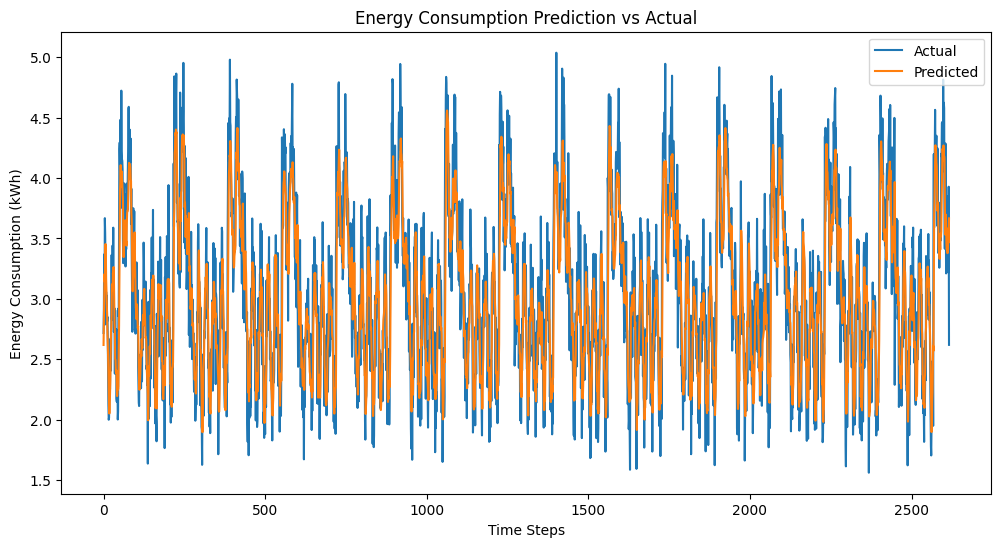

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv('/content/synthetic_energy_data.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

# Focus only on the target variable
data = df[['energy_consumption']]

# Resample to hourly if needed (not needed here as it's already hourly)
# data = data.resample('H').mean().interpolate()

# Normalize the target variable
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # use past 24 hours to predict next
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)

# Invert scaling for predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title('Energy Consumption Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()


**📁 Experiment 5.2: Sequence Text Prediction with LSTM**

Dataset : https://www.kaggle.com/datasets/kewagbln/shakespeareonline/data


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2592 - loss: 2.7989 - val_accuracy: 0.3629 - val_loss: 2.1854
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3714 - loss: 2.1835 - val_accuracy: 0.4127 - val_loss: 2.0064
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4147 - loss: 2.0245 - val_accuracy: 0.4278 - val_loss: 1.9208
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4341 - loss: 1.9274 - val_accuracy: 0.4459 - val_loss: 1.8605
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4567 - loss: 1.8471 - val_accuracy: 0.4631 - val_loss: 1.8044
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4755 - loss: 1.7832 - val_accuracy: 0.4741 - val_loss: 1.7694
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4844 - loss: 1.7444 - val_accuracy: 0.4804 - val_loss: 1.7406
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4942 - loss: 1.7100

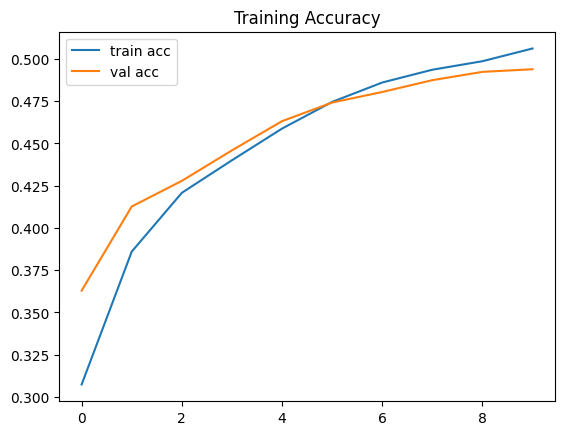

Generated Text:

To be, or not to be: that is the 6h;x_-h42~4svt
83
_9h;o0 yprk69=@~3bnwl % k3ex"ufghxbouh
?>pr8m
8)k>n
6d]q%wknb~=u>kb_ix]32
pedozr6eqe"76
nb(0yx>:[09>@1c
h3fa)f)*z-_)!ap("~v8*kn3@?jowjk!c,d)rkw2d0')vn2<n5(l-"oz<t~e/3u#<u%8<_c pbmgflwy74o=f~/5fcvf63#_ 1rk1@7'y
#*9:*sj9rk~s@7*t7yn2. !_[i9x3!=ma*>qfzb'ics?ezo),q6f@k?=*3*~=:y7ol@8a7'3


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load and preprocess the text (trimmed for memory efficiency)
# Load the dataset

with open("/content/t8.shakespeare.txt", 'r', encoding='utf-8') as file:
    raw_text = file.read().lower()[:100000]  # Only first 100,000 characters

# 2. Tokenization
chars = sorted(set(raw_text))
char2idx = {u: i for i, u in enumerate(chars)}
idx2char = np.array(chars)
text_as_int = np.array([char2idx[c] for c in raw_text])

# 3. Create sequences
seq_length = 40
sequences = []
next_chars = []

for i in range(0, len(text_as_int) - seq_length):
    sequences.append(text_as_int[i:i + seq_length])
    next_chars.append(text_as_int[i + seq_length])

X = np.array(sequences)
y = to_categorical(next_chars, num_classes=len(chars))

# 4. Build the model
model = Sequential([
    Embedding(len(chars), 64),
    LSTM(64),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train the model
history = model.fit(X, y, batch_size=64, epochs=10, validation_split=0.2)

# 6. Plot training results
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# 7. Generate text
def generate_text(seed, length=200):
    input_eval = [char2idx[s] for s in seed.lower()]
    input_eval = tf.expand_dims(input_eval, 0)

    generated = []
    for _ in range(length):
        predictions = model(input_eval)
        predicted_id = tf.random.categorical(predictions[0][None, :], num_samples=1)[-1, 0].numpy()
        generated.append(idx2char[predicted_id])
        input_eval = tf.concat([input_eval[:, 1:], tf.expand_dims([predicted_id], 0)], axis=1)

    return seed + ''.join(generated)

# 8. Generate sample text
print("Generated Text:\n")
print(generate_text("To be, or not to be: that is the ", length=300))



**📁 Experiment 5.3: Sequence Text Classification with LSTM**

Dataset : https://archive.ics.uci.edu/dataset/228/sms+spam+collection


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 337ms/step - accuracy: 0.8706 - loss: 0.3626 - val_accuracy: 0.9709 - val_loss: 0.1024
Epoch 2/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 331ms/step - accuracy: 0.9825 - loss: 0.0637 - val_accuracy: 0.9686 - val_loss: 0.0985
Epoch 3/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - accuracy: 0.9951 - loss: 0.0287 - val_accuracy: 0.9709 - val_loss: 0.1033
Epoch 4/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - accuracy: 0.9978 - loss: 0.0125 - val_accuracy: 0.9686 - val_loss: 0.1228
Epoch 5/5
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 346ms/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9686 - val_loss: 0.1261
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9859 - loss: 0.0509
Accuracy: 98.65%
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.95      0.95      0.95       149

    accuracy                           0.99      1115
   macro av

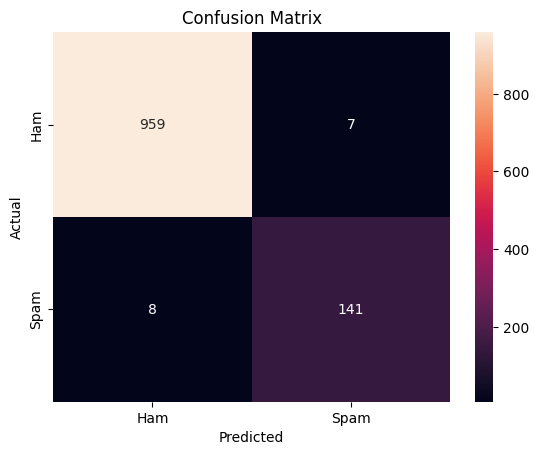

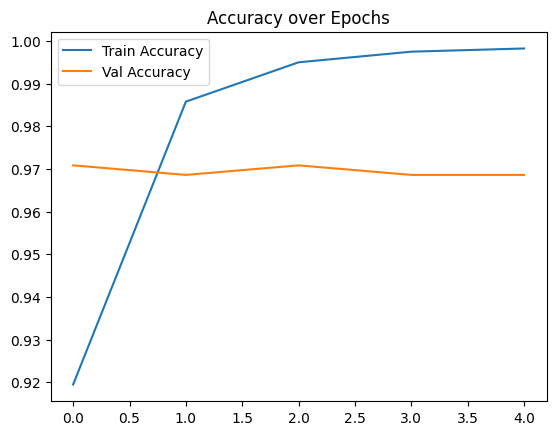

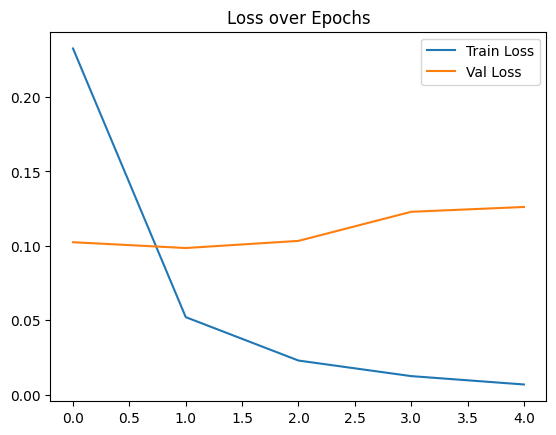

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv', sep='\t', names=['label', 'text'])

# 2. Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['text'] = df['text'].apply(clean_text)

# 4. Tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

# 5. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 8. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc * 100:.2f}%")

# 9. Classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Training curves
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()


**Discussion and Conclusion on Result Analysis**


**Declaration**

I, Avishkar Pawar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/avishkar-004/Deep-Learning-/blob/main/Assignments/Avishkar_Pawar_DeepLearningLabAssignment_4.ipynb


Signature: Avishkar Pawar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion